**SALONI.J-23011501013**

# **Upload the image file**

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving cat.jpg to cat (1).jpg


# **Necessary libraries**

In [ ]:
!pip install lpips


In [ ]:
!pip install torch lpips


**1. Take an image. Add noise to it. You may add Gaussian noise for three different noise intensities. Display the noisy images.**
**For the above case , measure the following parameters between the original image and its noisy versions.**

**(i) PSNR (Peak Signal to Noise Ratio)**

**(ii)SSIM( Structural Similarity Index Measure)**

**(iii) LPIPS( Learned Perceptual Image Patch Similarity).**

**Import libraries**

In [ ]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from lpips import LPIPS
from matplotlib import pyplot as plt

**Function to add sigmoid noise to an image**

In [ ]:
def add_sigmoid_noise(image, alpha=0.1):
    noise = np.random.normal(0, alpha, image.shape)
    noisy_image = image + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

**Read the uploaded image**

In [ ]:
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)


**Convert BGR to RGB**

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

 **Add Gaussian noise**

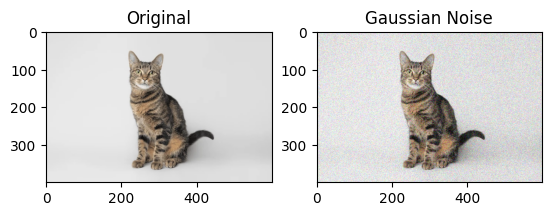

In [ ]:
gaussian_noise = np.random.normal(0, 25, image_rgb.shape)
image_gaussian_noise = np.clip(image_rgb + gaussian_noise, 0, 255).astype(np.uint8)
plt.subplot(2, 2, 1), plt.imshow(image_rgb), plt.title('Original')
plt.subplot(2, 2, 2), plt.imshow(image_gaussian_noise), plt.title('Gaussian Noise')
plt.show()

**Add Salt and Pepper noise**

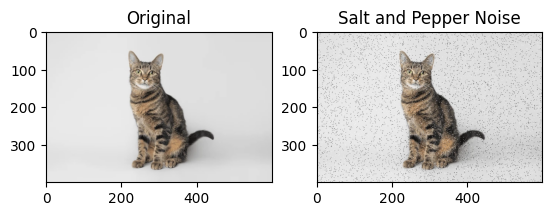

In [ ]:
salt_and_pepper_noise = np.random.choice([0, 1, 255], size=image_rgb.shape[:2], p=[0.02, 0.02, 0.96])
image_salt_and_pepper_noise = image_rgb.copy()
image_salt_and_pepper_noise[salt_and_pepper_noise == 1] = 255
image_salt_and_pepper_noise[salt_and_pepper_noise == 0] = 0
plt.subplot(2, 2, 1), plt.imshow(image_rgb), plt.title('Original')
plt.subplot(2, 2, 2), plt.imshow(image_salt_and_pepper_noise), plt.title('Salt and Pepper Noise')
plt.show()

**Add Sigmoid noise**

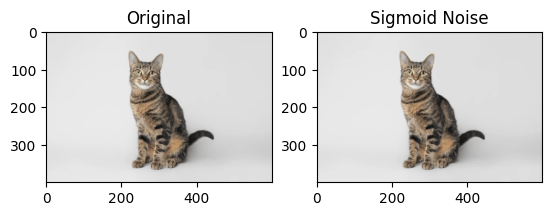

In [ ]:

sigmoid_noise = add_sigmoid_noise(image_rgb, alpha=0.1)
plt.subplot(2, 2, 1), plt.imshow(image_rgb), plt.title('Original')
plt.subplot(2, 2, 2), plt.imshow(sigmoid_noise), plt.title('Sigmoid Noise')
plt.show()

**Convert NumPy arrays to PyTorch tensors**

In [ ]:
image_rgb_tensor = torch.from_numpy(np.moveaxis(image_rgb, -1, 0)).float()
gaussian_noise_tensor = torch.from_numpy(np.moveaxis(image_gaussian_noise, -1, 0)).float()
salt_and_pepper_noise_tensor = torch.from_numpy(np.moveaxis(image_salt_and_pepper_noise, -1, 0)).float()
sigmoid_noise_tensor = torch.from_numpy(np.moveaxis(sigmoid_noise, -1, 0)).float()




**Calculate PSNR and SSIM**

In [ ]:

psnr_gaussian_noise = peak_signal_noise_ratio(image_rgb, image_gaussian_noise)
psnr_salt_and_pepper_noise = peak_signal_noise_ratio(image_rgb, image_salt_and_pepper_noise)
psnr_sigmoid_noise = peak_signal_noise_ratio(image_rgb, sigmoid_noise)



**Calculate SSIM with an appropriate win_size for multichannel images**

In [ ]:

ssim_gaussian_noise, _ = structural_similarity(image_rgb, image_gaussian_noise, win_size=11, multichannel=True, full=True)
ssim_salt_and_pepper_noise, _ = structural_similarity(image_rgb, image_salt_and_pepper_noise, win_size=11, multichannel=True, full=True)
ssim_sigmoid_noise, _ = structural_similarity(image_rgb, sigmoid_noise, win_size=11, multichannel=True, full=True)



<ipython-input-16-329e7f03a790>:2: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_gaussian_noise, _ = structural_similarity(image_rgb, image_gaussian_noise, win_size=11, multichannel=True, full=True)
<ipython-input-16-329e7f03a790>:3: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_salt_and_pepper_noise, _ = structural_similarity(image_rgb, image_salt_and_pepper_noise, win_size=11, multichannel=True, full=True)
<ipython-input-16-329e7f03a790>:4: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_sigmoid_noise, _ = structural_similarity(image_rgb, sigmoid_noise, win_size=11, multichannel=True, full=True)


**Calculate LPIPS**

In [ ]:

lpips_model = LPIPS(net='alex')
lpips_gaussian_noise = lpips_model(image_rgb_tensor, gaussian_noise_tensor).item()
lpips_salt_and_pepper_noise = lpips_model(image_rgb_tensor, salt_and_pepper_noise_tensor).item()
lpips_sigmoid_noise = lpips_model(image_rgb_tensor, sigmoid_noise_tensor).item()



Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 118MB/s]


Loading model from: /usr/local/lib/python3.10/dist-packages/lpips/weights/v0.1/alex.pth


**Print the results**

In [ ]:

print(f'PSNR (Gaussian Noise): {psnr_gaussian_noise:.2f}')
print(f'PSNR (Salt and Pepper Noise): {psnr_salt_and_pepper_noise:.2f}')
print(f'PSNR (Sigmoid Noise): {psnr_sigmoid_noise:.2f}')
print()
print(f'SSIM (Gaussian Noise): {ssim_gaussian_noise:.2f}')
print(f'SSIM (Salt and Pepper Noise): {ssim_salt_and_pepper_noise:.2f}')
print(f'SSIM (Sigmoid Noise): {ssim_sigmoid_noise:.2f}')
print()
print(f'LPIPS (Gaussian Noise): {lpips_gaussian_noise:.4f}')
print(f'LPIPS (Salt and Pepper Noise): {lpips_salt_and_pepper_noise:.4f}')
print(f'LPIPS (Sigmoid Noise): {lpips_sigmoid_noise:.4f}')

PSNR (Gaussian Noise): 20.90
PSNR (Salt and Pepper Noise): 18.07
PSNR (Sigmoid Noise): 51.14

SSIM (Gaussian Noise): 0.21
SSIM (Salt and Pepper Noise): 0.22
SSIM (Sigmoid Noise): 1.00

LPIPS (Gaussian Noise): 0.1686
LPIPS (Salt and Pepper Noise): 0.4651
LPIPS (Sigmoid Noise): 0.0002


**2. Take an image. Blur it. You may use Gaussian blur, motion blur and defocus blur. Display the blurred images.**
**For the above case , measure the following parameters between the original image and its blurred versions.**

**(i) PSNR (Peak Signal to Noise Ratio)**

**(ii)SSIM( Structural Similarity Index Measure)**

**(iii) LPIPS( Learned Perceptual Image Patch Similarity).**

In [ ]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from matplotlib import pyplot as plt
from PIL import Image
import torch
from lpips import LPIPS


In [ ]:
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

**Motion Blur**

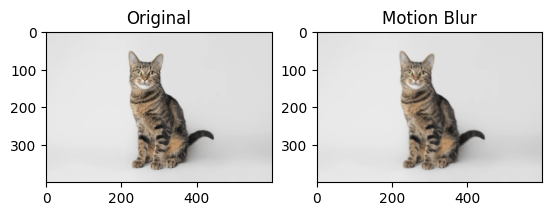

In [ ]:
kernel_motion_blur = np.array([[1, 0, 0],
                               [0, 1, 0],
                               [0, 0, 1]]) / 3
image_motion_blur = cv2.filter2D(image_rgb, -1, kernel_motion_blur)
plt.subplot(2, 2, 1), plt.imshow(image_rgb), plt.title('Original')
plt.subplot(2, 2, 2), plt.imshow(image_motion_blur), plt.title('Motion Blur')
plt.show()

**Gaussian Blur**

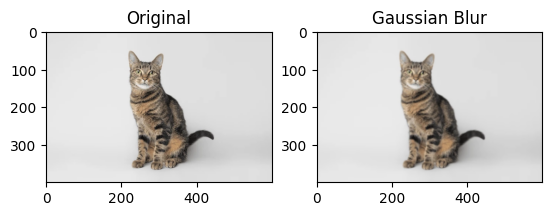

In [ ]:
image_gaussian_blur = cv2.GaussianBlur(image_rgb, (5, 5), 0)
plt.subplot(2, 2, 1), plt.imshow(image_rgb), plt.title('Original')
plt.subplot(2, 2, 2), plt.imshow(image_gaussian_blur), plt.title('Gaussian Blur')
plt.show()

**Defocus Blur**

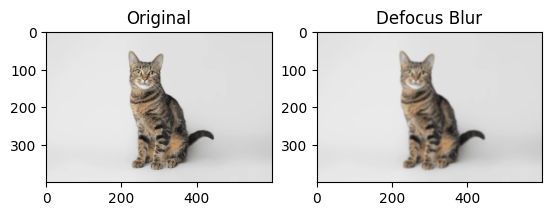

In [ ]:
kernel_defocus_blur = np.ones((5, 5), np.float32) / 25
image_defocus_blur = cv2.filter2D(image_rgb, -1, kernel_defocus_blur)
plt.subplot(2, 2, 1), plt.imshow(image_rgb), plt.title('Original')
plt.subplot(2, 2, 2), plt.imshow(image_defocus_blur), plt.title('Defocus Blur')
plt.show()

**Calculate PSNR and SSIM**

In [ ]:
psnr_motion_blur = peak_signal_noise_ratio(image_rgb, image_motion_blur)
psnr_gaussian_blur = peak_signal_noise_ratio(image_rgb, image_gaussian_blur)
psnr_defocus_blur = peak_signal_noise_ratio(image_rgb, image_defocus_blur)

**Calculate SSIM with an appropriate win_size for multichannel images**

In [ ]:
ssim_motion_blur, _ = structural_similarity(image_rgb, image_motion_blur, win_size=11, multichannel=True, full=True)
ssim_gaussian_blur, _ = structural_similarity(image_rgb, image_gaussian_blur, win_size=11, multichannel=True, full=True)
ssim_defocus_blur, _ = structural_similarity(image_rgb, image_defocus_blur, win_size=11, multichannel=True, full=True)

<ipython-input-29-88ea2cf9c603>:2: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_motion_blur, _ = structural_similarity(image_rgb, image_motion_blur, win_size=11, multichannel=True, full=True)
<ipython-input-29-88ea2cf9c603>:3: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_gaussian_blur, _ = structural_similarity(image_rgb, image_gaussian_blur, win_size=11, multichannel=True, full=True)
<ipython-input-29-88ea2cf9c603>:4: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_defocus_blur, _ = structural_similarity(image_rgb, image_defocus_blur, win_size=11, multichannel=True, full=True)


**Convert NumPy arrays to PyTorch tensors**

In [ ]:

image_rgb_tensor = torch.from_numpy(np.moveaxis(image_rgb, -1, 0)).float()
image_motion_blur_tensor = torch.from_numpy(np.moveaxis(image_motion_blur, -1, 0)).float()
image_gaussian_blur_tensor = torch.from_numpy(np.moveaxis(image_gaussian_blur, -1, 0)).float()
image_defocus_blur_tensor = torch.from_numpy(np.moveaxis(image_defocus_blur, -1, 0)).float()


**Collect Lpips**

In [ ]:

lpips_model = LPIPS(net='alex')
lpips_motion_blur = lpips_model(image_rgb_tensor, image_motion_blur_tensor).item()
lpips_gaussian_blur = lpips_model(image_rgb_tensor, image_gaussian_blur_tensor).item()
lpips_defocus_blur = lpips_model(image_rgb_tensor, image_defocus_blur_tensor).item()

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.10/dist-packages/lpips/weights/v0.1/alex.pth


**Print the results**

In [ ]:

print(f'PSNR (Motion Blur): {psnr_motion_blur:.2f}')
print(f'PSNR (Gaussian Blur): {psnr_gaussian_blur:.2f}')
print(f'PSNR (Defocus Blur): {psnr_defocus_blur:.2f}')
print()
print(f'SSIM (Motion Blur): {ssim_motion_blur:.2f}')
print(f'SSIM (Gaussian Blur): {ssim_gaussian_blur:.2f}')
print(f'SSIM (Defocus Blur): {ssim_defocus_blur:.2f}')
print()
print(f'LPIPS (Motion Blur): {lpips_motion_blur:.4f}')
print(f'LPIPS (Gaussian Blur): {lpips_gaussian_blur:.4f}')
print(f'LPIPS (Defocus Blur): {lpips_defocus_blur:.4f}')


PSNR (Motion Blur): 35.43
PSNR (Gaussian Blur): 34.90
PSNR (Defocus Blur): 32.17

SSIM (Motion Blur): 0.98
SSIM (Gaussian Blur): 0.98
SSIM (Defocus Blur): 0.96

LPIPS (Motion Blur): 0.0142
LPIPS (Gaussian Blur): 0.0224
LPIPS (Defocus Blur): 0.0317
